In [1]:
from importlib import reload
import sys
sys.path.append("/Users/adambedel/Documents/Coursework/NERS590/SAMM")
import SAMM
import src.circuits
import src.objects
import src.physics
import scipy.constants as scipyc
import matplotlib.pyplot as plt
import numpy as np
reload(SAMM)
reload(src.objects)

import warnings
warnings.filterwarnings('ignore')

In [2]:
myArgs = src.objects.args.default()
# myArgs.circ_init = src.circuits.sineCircuit(0, 30e6, 100e-9)
sim = SAMM.sim(myArgs, t=np.linspace(0,150e-9, 15000))  # extend domain
solution1 = sim.run()

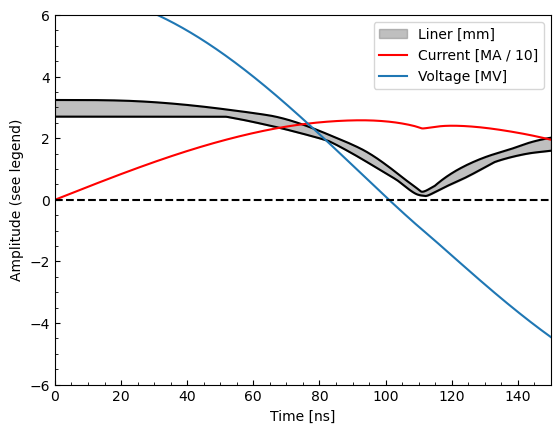

In [4]:
ax = sim.plot_trajectory()
ax.plot(sim.t * 1e9, sim.V / 1e6, label="Voltage [MV]")
ax.axhline(0, color='k', linestyle='--')
ax.set_ylim((-6, 6))

catch = ax.legend()

The stagnation time was 112 ns
The convergence ratio was 12.4
The peak power was 699 TW
The peak current was 25.8 MA
The peak temperature was 6.7 keV
The yield of DT neutrons was 6.05e+17
The yield of DD neutrons was 1.9e+15


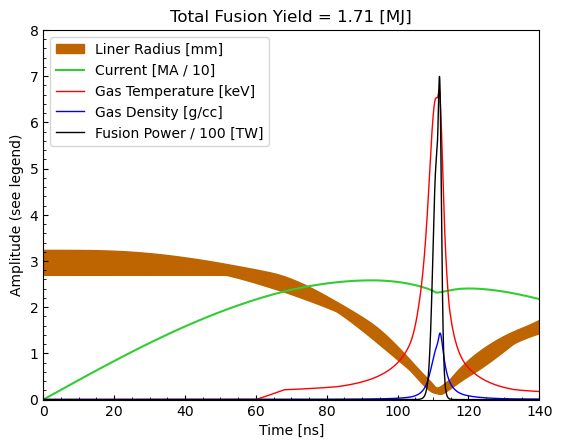

In [5]:
ax = sim.plot_powerbalance()

def density(y): return (y.Nd + y.Nt) * 2.5 * scipyc.atomic_mass / (scipyc.pi * y.rg**2 * sim.args.h) / 1000

ax.plot(sim.t * 1e9, src.physics.gasTempkev(sim.solution, sim.args), color='red', label="Gas Temperature [keV]", lw=1)
ax.plot(sim.t * 1e9, density(sim.solution), color='blue', label="Gas Density [g/cc]", lw=1)

Yield_fusion_MJ = sim.solution.Ndt_neut * 17.6 * scipyc.e
Power_fusion_TW = np.gradient(Yield_fusion_MJ, sim.t) * 1e-6

plt.plot(sim.t *1e9, Power_fusion_TW / 100, color='k', label="Fusion Power / 100 [TW]", lw=1)
plt.title(f"Total Fusion Yield = {Yield_fusion_MJ[-1]:.3g} [MJ]")
ax.legend()

stag_idx = np.argmin(sim.solution.rg)

print(f"The stagnation time was {sim.t[stag_idx] * 1e9:.3g} ns")
print(f"The convergence ratio was {sim.solution.rl[0,-1] / np.min(sim.solution.rl[:,-1]):.3g}")
print(f"The peak power was {np.max(Power_fusion_TW):.3g} TW")
print(f"The peak current was {np.max(sim.I) * 1e-6:.3g} MA")
print(f"The peak temperature was {np.max(src.physics.gasTempkev(sim.solution, sim.args)):.3g} keV")
print(f"The yield of DT neutrons was {sim.solution.Ndt_neut[-1]:.3g}")
print(f"The yield of DD neutrons was {sim.solution.Ndd_neut[-1]:.3g}")

In [6]:
catch = sim.run_with_diffusion()

The stagnation time was 112 ns
The convergence ratio was 12.6
The peak power was 666 TW
The peak current was 25.8 MA
The peak temperature was 6.65 keV
The yield of DT neutrons was 6.16e+17
The yield of DD neutrons was 1.94e+15


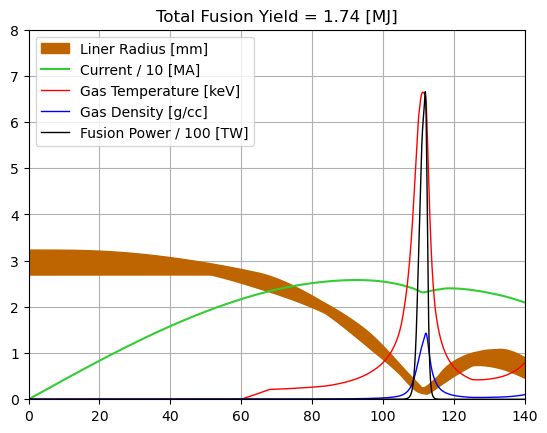

In [7]:
plt.grid()
plt.fill_between(sim.t * 1e9, sim.solution.rl[:, -1] * 1e3, sim.solution.rg * 1e3, color="#BE6400", label="Liner Radius [mm]", zorder=2)
plt.plot(sim.t * 1e9, sim.I / 1e7, label='Current / 10 [MA]', color='#32CD32')
plt.plot(sim.t * 1e9, src.physics.gasTempkev(sim.solution, sim.args), color='red', label="Gas Temperature [keV]", lw=1)
plt.plot(sim.t * 1e9, density(sim.solution), color='blue', label="Gas Density [g/cc]", lw=1)
plt.xlim(0, 140)
plt.ylim(0, 8)

Yield_fusion_MJ = sim.solution.Ndt_neut * 17.6 * scipyc.e
Power_fusion_TW = np.gradient(Yield_fusion_MJ, sim.t) * 1e-6

plt.plot(sim.t *1e9, Power_fusion_TW / 100, color='k', label="Fusion Power / 100 [TW]", lw=1)
plt.title(f"Total Fusion Yield = {Yield_fusion_MJ[-1]:.3g} [MJ]")
plt.legend()

stag_idx = np.argmin(sim.solution.rg)

print(f"The stagnation time was {sim.t[stag_idx] * 1e9:.3g} ns")
print(f"The convergence ratio was {sim.solution.rl[0,-1] / np.min(sim.solution.rl[:,-1]):.3g}")
print(f"The peak power was {np.max(Power_fusion_TW):.3g} TW")
print(f"The peak current was {np.max(sim.I) * 1e-6:.3g} MA")
print(f"The peak temperature was {np.max(src.physics.gasTempkev(sim.solution, sim.args)):.3g} keV")
print(f"The yield of DT neutrons was {sim.solution.Ndt_neut[-1]:.3g}")
print(f"The yield of DD neutrons was {sim.solution.Ndd_neut[-1]:.3g}")

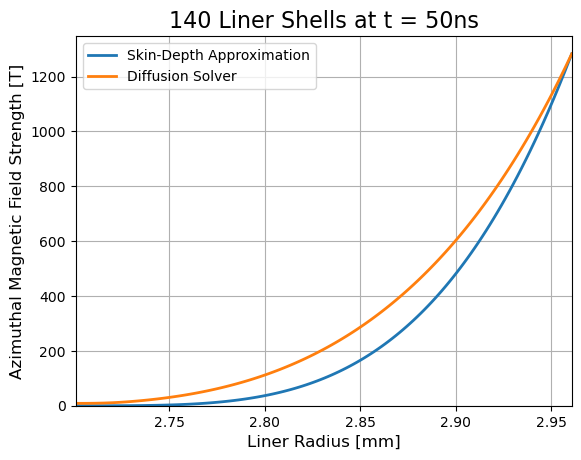

In [8]:
t = 5000
plt.title(f"140 Liner Shells at t = {sim.t[t] * 1e9:.3g}ns", fontsize=16)
interfaces = np.append(sim.solution.rg[t], sim.solution.rl[t])
b_theta_analytical = scipyc.mu_0 * sim.I[t] / (2 * scipyc.pi * sim.solution.rl[t, -1]) * ((interfaces - sim.solution.rg[t]) / (sim.solution.rl[t, -1] - sim.solution.rg[t])) ** myArgs.mat.beta
plt.plot(interfaces * 1e3, b_theta_analytical, label = "Skin-Depth Approximation", linewidth=2)
plt.plot(interfaces * 1e3, sim.B_history[t], label = "Diffusion Solver", linewidth=2)
plt.grid()
plt.ylabel("Azimuthal Magnetic Field Strength [T]", fontsize=12)
plt.xlim((interfaces * 1e3)[0], (interfaces * 1e3)[-1])
plt.xlabel("Liner Radius [mm]", fontsize=12)
catch = plt.legend()
catch = plt.ylim(bottom=0)

In [9]:
# import matplotlib.pyplot as plt
# import matplotlib.animation as animation
# import numpy as np
# import scipy.constants as scipyc
# from IPython.display import HTML

# # -------------------------
# # Figure setup
# # -------------------------
# fig, ax = plt.subplots()

# line_analytic, = ax.plot([], [], lw=2, label="Analytic")
# line_diffuse,  = ax.plot([], [], lw=2, label="Diffusion Solver")

# ax.set_xlabel("Radius [m]")
# ax.set_ylabel(r"$B_\theta$ [T]")
# ax.legend()

# # -------------------------
# # Animation update function
# # -------------------------
# def update(t):
#     # moving mesh
#     interfaces = np.append(sim.solution.rg[t], sim.solution.rl[t])

#     # analytic field
#     b_theta_analytic = (
#         scipyc.mu_0 * sim.I[t]
#         / (2 * scipyc.pi * sim.solution.rl[t, -1])
#         * ((interfaces - sim.solution.rg[t])
#            / (sim.solution.rl[t, -1] - sim.solution.rg[t])) ** myArgs.mat.beta
#     )

#     b_theta_diffuse = sim.B_history[t]

#     # update line data
#     line_analytic.set_data(interfaces, b_theta_analytic)
#     line_diffuse.set_data(interfaces, b_theta_diffuse)

#     # -------- x-axis autoscale --------
#     xmin = interfaces.min()
#     xmax = interfaces.max()
#     xpad = 0.05 * (xmax - xmin)
#     ax.set_xlim(xmin - xpad, xmax + xpad)

#     # -------- y-axis autoscale --------
#     ymin = min(b_theta_analytic.min(), b_theta_diffuse.min())
#     ymax = max(b_theta_analytic.max(), b_theta_diffuse.max())

#     if ymax > ymin:
#         ypad = 0.1 * (ymax - ymin)
#     else:
#         ypad = 1e-12

#     ax.set_ylim(ymin - ypad, ymax + ypad)

#     ax.set_title(f"Time = {sim.t[t] * 1e9:.3g} ns")

#     return line_analytic, line_diffuse


# # -------------------------
# # Animation driver
# # -------------------------
# stride = 50
# frames = range(0, len(sim.t), stride)

# ani = animation.FuncAnimation(
#     fig,
#     update,
#     frames=frames,
#     interval=50,
#     blit=False   # REQUIRED when changing limits
# )

# HTML(ani.to_jshtml())


In [10]:
# import matplotlib.pyplot as plt
# import matplotlib.animation as animation
# import numpy as np
# import scipy.constants as scipyc
# from IPython.display import HTML

# # -------------------------
# # Precompute quantities
# # -------------------------
# t_ns = sim.t * 1e9

# Yield_fusion_MJ = sim.solution.Ndt_neut * 17.6 * scipyc.e
# Power_fusion_TW = np.gradient(Yield_fusion_MJ, sim.t) * 1e-6

# # -------------------------
# # Figure setup
# # -------------------------
# fig, ax = plt.subplots()

# ax.grid()

# # Static plots
# ax.fill_between(
#     t_ns,
#     sim.solution.rl[:, -1] * 1e3,
#     sim.solution.rg * 1e3,
#     color="#BE6400",
#     label="Liner Radius [mm]",
#     zorder=2
# )

# ax.plot(t_ns, sim.I / 1e7, label="Current / 10 [MA]", color="#32CD32")
# ax.plot(t_ns, src.physics.gasTempkev(sim.solution, sim.args),
#         color="red", label="Gas Temperature [keV]", lw=1)
# ax.plot(t_ns, density(sim.solution),
#         color="blue", label="Gas Density [g/cc]", lw=1)
# ax.plot(t_ns, Power_fusion_TW / 100,
#         color="k", label="Fusion Power / 100 [TW]", lw=1)

# ax.set_xlim(0, 140)
# ax.set_ylim(0, 8)

# ax.set_xlabel("Time [ns]")
# ax.set_ylabel("Amplitude (see legend)")
# ax.set_title(f"Total Fusion Yield = {Yield_fusion_MJ[-1]:.3g} MJ")
# ax.legend()

# # -------------------------
# # Moving vertical time marker
# # -------------------------
# time_line = ax.axvline(t_ns[0], color="k", ls="--", lw=2, zorder=5)

# # -------------------------
# # Animation update
# # -------------------------
# def update(frame):
#     time_line.set_xdata([t_ns[frame], t_ns[frame]])
#     return (time_line,)

# # -------------------------
# # Animation driver
# # -------------------------
# stride = 50
# frames = range(0, len(sim.t), stride)

# ani = animation.FuncAnimation(
#     fig,
#     update,
#     frames=frames,
#     interval=50,
#     blit=False
# )

# HTML(ani.to_jshtml())


In [11]:
# import matplotlib.pyplot as plt
# import matplotlib.animation as animation
# import numpy as np
# import scipy.constants as scipyc

# # -------------------------
# # Setup figure + axes
# # -------------------------
# fig, (axL, axR) = plt.subplots(1, 2, figsize=(14, 5))

# # =========================
# # LEFT PANEL: B(r) profile
# # =========================
# line_analytic, = axL.plot([], [], label="Analytic")
# line_diffuse,  = axL.plot([], [], label="Diffusion Solver")
# axL.set_xlabel("Liner Radius [mm]")
# axL.set_ylabel("Bθ [T]")
# axL.set_ylim(bottom=0)
# axL.legend()

# # =========================
# # RIGHT PANEL: Time history
# # =========================
# t_ns = sim.t * 1e9

# axR.grid()
# axR.fill_between(
#     t_ns,
#     sim.solution.rl[:, -1] * 1e3,
#     sim.solution.rg * 1e3,
#     color="#BE6400",
#     label="Liner Radius [mm]",
#     zorder=2
# )
# axR.plot(t_ns, sim.I / 1e7, label='Current / 10 [MA]', color='#32CD32')
# axR.plot(t_ns, src.physics.gasTempkev(sim.solution, sim.args),
#          color='red', label="Gas Temperature [keV]", lw=1)

# axR.set_xlim(t_ns.min(), t_ns.max())
# axR.set_ylim(0, 8)
# axR.set_xlabel("Time [ns]")
# axR.legend()

# # vertical cursor
# time_line = axR.axvline(t_ns[0], color='k', lw=2)

# # -------------------------
# # Animation update
# # -------------------------
# def update(frame):
#     # -------- LEFT PANEL --------
#     interfaces = np.append(sim.solution.rg[frame], sim.solution.rl[frame])

#     b_theta_analytic = (
#         scipyc.mu_0 * sim.I[frame]
#         / (2 * scipyc.pi * sim.solution.rl[frame, -1])
#         * ((interfaces - sim.solution.rg[frame])
#            / (sim.solution.rl[frame, -1] - sim.solution.rg[frame])) ** myArgs.mat.beta
#     )

#     line_analytic.set_data(interfaces * 1e3, b_theta_analytic)
#     line_diffuse.set_data(interfaces * 1e3, sim.B_history[frame])

#     axL.set_xlim(interfaces.min() * 1e3, interfaces.max() * 1e3)
#     axL.set_ylim(
#         0,
#         1.05 * max(b_theta_analytic.max(), sim.B_history[frame].max())
#     )

#     axL.set_title(f"Bθ(r) at t = {t_ns[frame]:.0f} ns")

#     # -------- RIGHT PANEL --------
#     x = t_ns[frame]
#     time_line.set_xdata([x, x])

#     return line_analytic, line_diffuse, time_line

# # -------------------------
# # Animation driver
# # -------------------------
# stride = 100
# frames = range(0, len(sim.t), stride)

# ani = animation.FuncAnimation(
#     fig,
#     update,
#     frames=frames,
#     interval=100,
#     blit=False   # required since limits change
# )

# from IPython.display import HTML
# HTML(ani.to_jshtml())


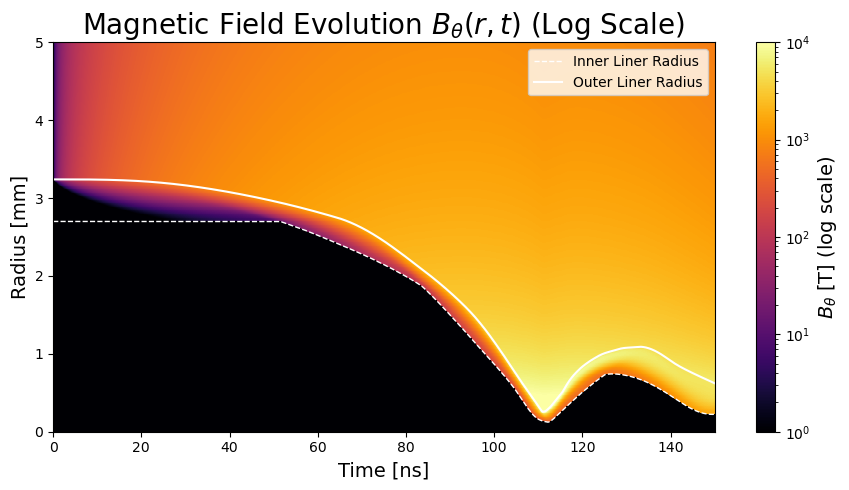

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.constants as scipyc
from matplotlib.colors import LogNorm

# =========================
# Build space–time grid
# =========================
Nt = len(sim.t)
r_max = 5e-3              # 5 mm in meters
Nr = 500

r_grid = np.linspace(0.0, r_max, Nr)
t_ns = sim.t * 1e9
r_mm = r_grid * 1e3

# =========================
# Allocate B(r,t)
# =========================
B_rt = np.zeros((Nt, Nr))

# =========================
# Fill field values
# =========================
for ti in range(Nt):
    rg = sim.solution.rg[ti]
    rl = sim.solution.rl[ti]
    ro = rl[-1]
    I  = sim.I[ti]

    interfaces = np.append(rg, rl)
    B_liner = sim.B_history[ti]

    inside  = r_grid < rg
    liner   = (r_grid >= rg) & (r_grid <= ro)
    outside = r_grid > ro

    # inside cavity
    B_rt[ti, inside] = 0.0

    # liner (diffusion solution)
    B_rt[ti, liner] = np.interp(
        r_grid[liner],
        interfaces,
        B_liner
    )

    # outside vacuum
    B_rt[ti, outside] = (
        scipyc.mu_0 * I / (2 * scipyc.pi * r_grid[outside])
    )

# =========================
# Avoid zeros for log scale
# =========================
B_rt[B_rt <= 0] = 1e-6   # floor in Tesla

# =========================
# Plot heatmap (LOG SCALE)
# =========================
plt.figure(figsize=(9, 5))

pcm = plt.pcolormesh(
    t_ns,
    r_mm,
    B_rt.T,
    shading="auto",
    cmap="inferno",
    norm=LogNorm(vmin=1e0, vmax=1e4),
)

cbar = plt.colorbar(pcm)
cbar.set_label(r"$B_\theta$ [T] (log scale)", fontsize=14)

# overlay liner boundaries
plt.plot(t_ns, sim.solution.rg * 1e3, 'w--', lw=1, label="Inner Liner Radius")
plt.plot(t_ns, sim.solution.rl[:, -1] * 1e3, 'w-', lw=1.5, label="Outer Liner Radius")

plt.xlabel("Time [ns]", fontsize=14)
plt.ylabel("Radius [mm]", fontsize=14)
plt.ylim(0, 5)
plt.title("Magnetic Field Evolution $B_\\theta(r,t)$ (Log Scale)", fontsize=20)
plt.legend(loc="upper right")
plt.tight_layout()
plt.show()


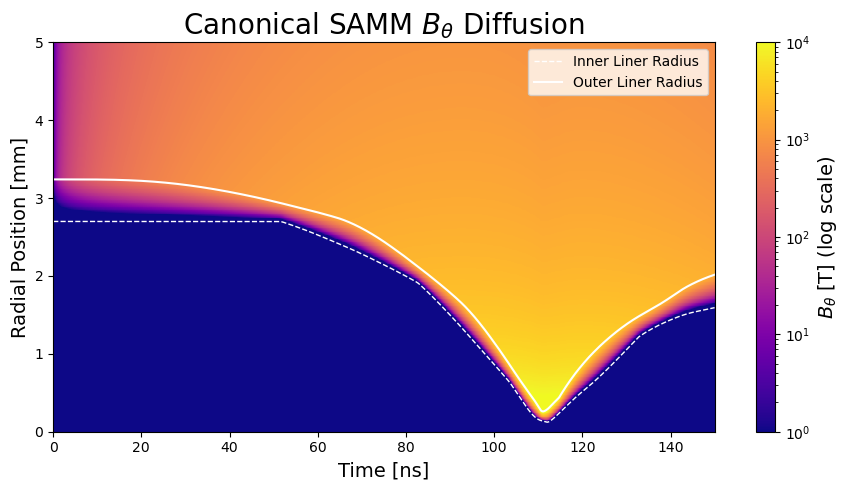

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.constants as scipyc
from matplotlib.colors import LogNorm

# =========================
# Build space–time grid
# =========================
Nt = len(sim.t)
r_max = 5e-3              # 5 mm in meters
Nr = 500

r_grid = np.linspace(0.0, r_max, Nr)
t_ns = sim.t * 1e9
r_mm = r_grid * 1e3

# =========================
# Allocate B(r,t)
# =========================
B_rt = np.zeros((Nt, Nr))

# =========================
# Fill field values
# =========================
for ti in range(Nt):
    rg = sim.solution.rg[ti]
    rl = sim.solution.rl[ti]
    ro = rl[-1]
    I  = sim.I[ti]

    interfaces = np.append(rg, rl)

    # analytical liner field (defined on interfaces)
    b_theta_analytic = (
        scipyc.mu_0 * I
        / (2 * scipyc.pi * ro)
        * ((interfaces - rg) / (ro - rg)) ** myArgs.mat.beta
    )

    inside  = r_grid < rg
    liner   = (r_grid >= rg) & (r_grid <= ro)
    outside = r_grid > ro

    # inside cavity
    B_rt[ti, inside] = 0.0

    # liner (ANALYTICAL solution)
    B_rt[ti, liner] = np.interp(
        r_grid[liner],
        interfaces,
        b_theta_analytic
    )

    # outside vacuum
    B_rt[ti, outside] = (
        scipyc.mu_0 * I / (2 * scipyc.pi * r_grid[outside])
    )

# =========================
# Avoid zeros for log scale
# =========================
B_rt[B_rt <= 0] = 1e-6   # floor in Tesla

# =========================
# Plot heatmap (LOG SCALE)
# =========================
plt.figure(figsize=(9, 5))

pcm = plt.pcolormesh(
    t_ns,
    r_mm,
    B_rt.T,
    shading="auto",
    cmap="plasma",
    norm=LogNorm(vmin=1e0, vmax=1e4)
)

cbar = plt.colorbar(pcm)
cbar.set_label(r"$B_\theta$ [T] (log scale)", fontsize=14)

# overlay liner boundaries
plt.plot(t_ns, sim.solution.rg * 1e3, 'w--', lw=1, label="Inner Liner Radius")
plt.plot(t_ns, sim.solution.rl[:, -1] * 1e3, 'w-', lw=1.5, label="Outer Liner Radius")

plt.xlabel("Time [ns]", fontsize=14)
plt.ylabel("Radial Position [mm]", fontsize=14)
plt.ylim(0, 5)
plt.title(r"Canonical SAMM $B_\theta$ Diffusion", fontsize=20)
plt.legend(loc="upper right")
plt.tight_layout()
plt.show()


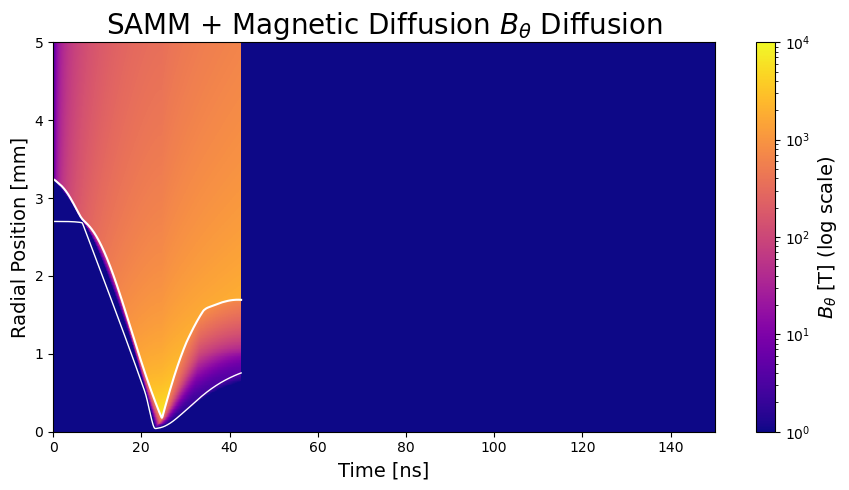

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.constants as scipyc
from matplotlib.colors import LogNorm

# =========================
# Build space–time grid
# =========================
Nt = len(sim.t)
r_max = 5e-3              # 5 mm in meters
Nr = 500

r_grid = np.linspace(0.0, r_max, Nr)
t_ns = sim.t * 1e9
r_mm = r_grid * 1e3

# =========================
# Allocate B(r,t)
# =========================
B_rt = np.zeros((Nt, Nr))

# =========================
# Fill field values
# =========================
for ti in range(Nt):
    rg = sim.solution.rg[ti]
    rl = sim.solution.rl[ti]
    ro = rl[-1]
    I  = sim.I[ti]

    interfaces = np.append(rg, rl)
    B_liner = sim.B_history[ti]

    inside  = r_grid < rg
    liner   = (r_grid >= rg) & (r_grid <= ro)
    outside = r_grid > ro

    # -------------------------
    # Liner field (diffusion)
    # -------------------------
    B_rt[ti, liner] = np.interp(
        r_grid[liner],
        interfaces,
        B_liner
    )

    # # -------------------------
    # # Interior field (LINEAR)
    # # -------------------------
    # if np.any(liner):
    #     B_rg = np.interp(rg, interfaces, B_liner)   # value at inner boundary
    #     B_rt[ti, inside] = B_rg * (r_grid[inside] / rg)

    # -------------------------
    # Interior field (EXPONENTIAL)
    # -------------------------
    if np.any(inside):
        B_rg = np.interp(rg, interfaces, B_liner)   # value at inner boundary

        alpha = 10  # controls curvature (tune this)

        r_norm = r_grid[inside] / rg
        B_rt[ti, inside] = B_rg * (np.exp(alpha * r_norm) - 1.0) / (np.exp(alpha) - 1.0)


    # -------------------------
    # Exterior vacuum field
    # -------------------------
    B_rt[ti, outside] = (
        scipyc.mu_0 * I / (2 * scipyc.pi * r_grid[outside])
    )

# =========================
# Avoid zeros for log scale
# =========================
B_rt[B_rt <= 0] = 1e-6   # floor in Tesla

# =========================
# Plot heatmap (LOG SCALE)
# =========================
plt.figure(figsize=(9, 5))

pcm = plt.pcolormesh(
    t_ns,
    r_mm,
    B_rt.T,
    shading="auto",
    cmap="plasma",
    norm=LogNorm(vmin=1e0, vmax=1e4)
)

cbar = plt.colorbar(pcm)
cbar.set_label(r"$B_\theta$ [T] (log scale)", fontsize=14)

# overlay liner boundaries
plt.plot(t_ns, sim.solution.rg * 1e3, 'w-', lw=1, label="Inner Liner Radius")
plt.plot(t_ns, sim.solution.rl[:, -1] * 1e3, 'w-', lw=1.5, label="Outer Liner Radius")

plt.xlabel("Time [ns]", fontsize=14)
plt.ylabel("Radial Position [mm]", fontsize=14)
plt.ylim(0, 5)
plt.title(r"SAMM + Magnetic Diffusion $B_\theta$ Diffusion", fontsize=20)
plt.tight_layout()
plt.show()
